# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
from datetime import date

analysis_date = date.today().strftime("%m/%d/%y")

# Import API key
from api_keys import weather_api_key
units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("""
Beginning Data Retrieval
-----------------------------
    """)
#set iterators for sets and records. there will be ten sets of fifty records to process.
s = 1
r = 0

#create lists for saving output
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#begin iterating through city list
for city in cities:

    
    # query api for city
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
    response_json = requests.get(url).json()
#     pp.pprint(response_json)
    raw_df = response_json
#     pp.pprint(raw_df)
    
    
    try:
        # save name, lat, long, max temp, humidity, cloudiness, wind speed, country, and date for each city
        
        lats.append(raw_df['coord']['lat'])
        lngs.append(raw_df['coord']['lon'])
        max_temps.append(raw_df['main']['temp_max'])        
        humidities.append(raw_df['main']['humidity'])
        cloudiness.append(raw_df['clouds']['all'])
        wind_speeds.append(raw_df['wind']['speed'])
        countries.append(raw_df['sys']['country'])
        dates.append(raw_df['dt'])
        found_cities.append(city)
        
        #check if 50 records have been processed and move to the next batch
        if (r + 1) == 51:
            r = 1
            s += 1
        else: 
            r += 1

        print(f'Processing Record {r} of Set {s} | {city}')
        
    except KeyError:
        
        print("City not found. Skipping...")     
        
print("""
-----------------------------
Data Retrieval Complete
-----------------------------
    """)


Beginning Data Retrieval
-----------------------------
    
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | olinda
Processing Record 3 of Set 1 | hun
Processing Record 4 of Set 1 | aripuana
Processing Record 5 of Set 1 | valdivia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | mutis
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | yebaishou
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | port alfred
City not found. Skipping...
Processing Record 14 of Set 1 | mareeba
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | bedesa
Processing Record 19 of Set 1 | ushuaia
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | zaysan
Processing Record 21 of Set 1 | salalah
Processing Record

City not found. Skipping...
Processing Record 35 of Set 4 | la ronge
Processing Record 36 of Set 4 | mangrol
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | thompson
City not found. Skipping...
Processing Record 43 of Set 4 | turukhansk
City not found. Skipping...
Processing Record 44 of Set 4 | dalby
Processing Record 45 of Set 4 | takayama
Processing Record 46 of Set 4 | opuwo
Processing Record 47 of Set 4 | havelock
Processing Record 48 of Set 4 | ossora
Processing Record 49 of Set 4 | wau
Processing Record 50 of Set 4 | xifeng
Processing Record 1 of Set 5 | maryborough
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | valleyview
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | port blair
Processing Record 6 of Set 5 | raton
Processing Reco

Processing Record 20 of Set 8 | guanica
Processing Record 21 of Set 8 | odweyne
Processing Record 22 of Set 8 | broome
Processing Record 23 of Set 8 | naryan-mar
Processing Record 24 of Set 8 | pisco
Processing Record 25 of Set 8 | ancud
Processing Record 26 of Set 8 | yar-sale
Processing Record 27 of Set 8 | tonekabon
Processing Record 28 of Set 8 | shimanovsk
Processing Record 29 of Set 8 | hofn
City not found. Skipping...
Processing Record 30 of Set 8 | yerbogachen
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | tarpon springs
Processing Record 33 of Set 8 | taksimo
Processing Record 34 of Set 8 | deputatskiy
Processing Record 35 of Set 8 | saint-leu
Processing Record 36 of Set 8 | ambon
Processing Record 37 of Set 8 | wasilla
Processing Record 38 of Set 8 | kupang
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | lugo
Processing Record 41 of Set 8 | vryheid
Processing Record 42 of Set 8 | tazovskiy
Processing Record 43 of Set 8 | port hard

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#check lengths of arrays
print(f'''
cities: {len(cities)}
found_cities: {len(found_cities)}
lats: {len(lats)}
longs: {len(lngs)}
temps: {len(max_temps)}
humidities: {len(humidities)}
clouds: {len(cloudiness)}
speeds: {len(wind_speeds)}
countries: {len(countries)}
dates: {len(dates)}
''')

#prepare dict for dataframe from lists created with api
prep_df = {
    'City':found_cities,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds, 
    'Country':countries,
    'Date':dates
}

#create dataframe
city_data = pd.DataFrame(prep_df)

#export to csv
city_data.to_csv(output_data_file, index_label='City ID')
city_data.head()


cities: 608
found_cities: 553
lats: 553
longs: 553
temps: 553
humidities: 553
clouds: 553
speeds: 553
countries: 553
dates: 553



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-27.27,87,91,10.29,RU,1612681763
1,olinda,-8.0089,-34.8553,75.20,83,40,3.44,BR,1612681675
2,hun,29.1268,15.9477,63.77,28,100,10.04,LY,1612681763
3,aripuana,-9.1667,-60.6333,72.45,99,100,2.01,BR,1612681747
4,valdivia,-39.8142,-73.2459,57.20,94,90,4.61,CL,1612681763


In [6]:
### change this later so it uses the data created from the api.

city_csv = output_data_file
city_data = pd.read_csv(city_csv)
city_data.head()

# describe city_data
city_data.describe()

,City ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,276.000000,20.459008,17.983490,49.439222,72.321881,53.077758,8.373092,1.612682e+09
std,159.781622,33.404818,91.694784,33.327283,20.649276,41.011037,6.027958,9.493706e+01
min,0.000000,-54.800000,-179.166700,-43.010000,9.000000,0.000000,0.200000,1.612681e+09
25%,138.000000,-7.381700,-63.549700,28.400000,62.000000,2.000000,4.000000,1.612682e+09
50%,276.000000,22.678300,20.282700,62.470000,78.000000,64.000000,7.000000,1.612682e+09
75%,414.000000,50.200100,97.522800,75.270000,88.000000,96.000000,11.180000,1.612682e+09
max,552.000000,78.218600,179.316700,95.000000,100.000000,100.000000,36.150000,1.612682e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

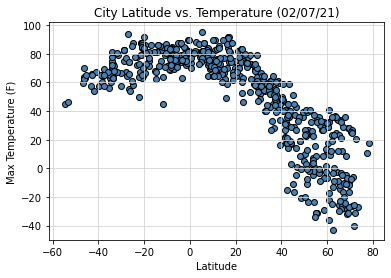

Put in sentences that describe what is being analyzed


In [24]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Humidity Plot

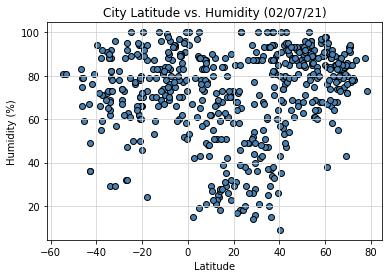

Put in sentences that describe what is being analyzed


In [25]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Cloudiness Plot

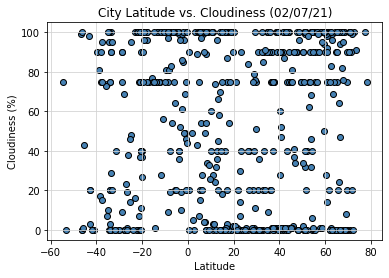

Put in sentences that describe what is being analyzed


In [26]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Latitude vs. Wind Speed Plot

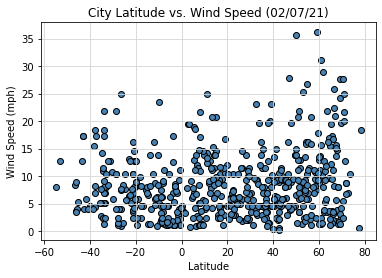

Put in sentences that describe what is being analyzed


In [27]:
#set up scatter plot
x_values = city_data["Lat"]
y_values = city_data["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

# describe what's happening
print(f'Put in sentences that describe what is being analyzed')

## Linear Regression

In [35]:
#get data for each hemisphere
north = city_data.loc[city_data['Lat']>=0, :]
# north.describe()

south = city_data.loc[city_data['Lat']<0, :]
# south.describe()

### Max Temp vs. Latitude by Hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: -0.8611717644494633


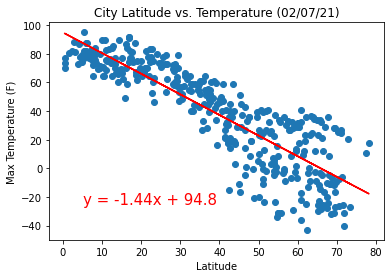

In [43]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-vlaue is: 0.5332781819693206


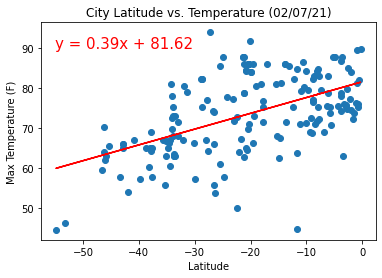

In [42]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Max Temp"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Temperature ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Humidity (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.41131413931246297


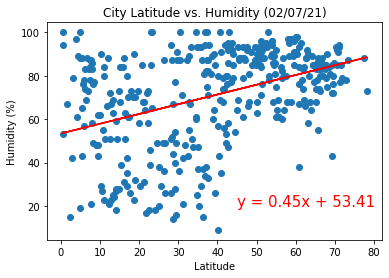

In [47]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-vlaue is: 0.22819543917593652


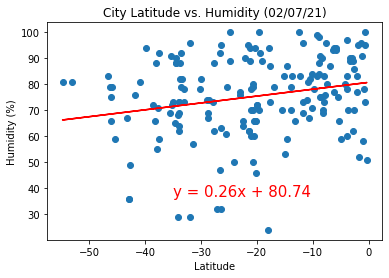

In [50]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,37),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Cloudiness (%) vs. Latitude by Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.18572265493711376


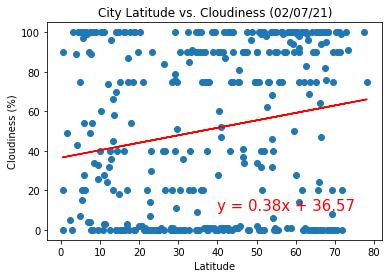

In [57]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-vlaue is: 0.33092446845221407


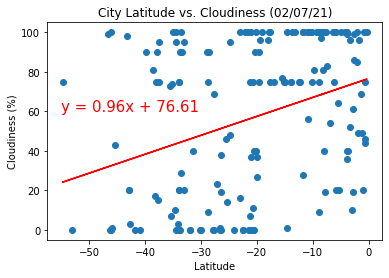

In [60]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>

### Wind Speed (mph) vs. Latitude by Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: 0.14409438016590237


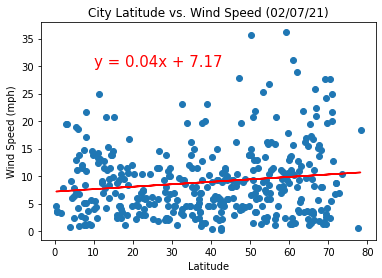

In [62]:
#set up scatter plot
x_values = north["Lat"]
y_values = north["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-vlaue is: -0.25701721811571937


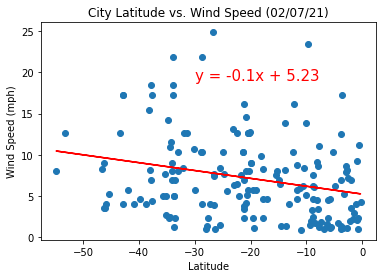

In [68]:
#set up scatter plot
x_values = south["Lat"]
y_values = south["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-vlaue is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,19),fontsize=15,color="red")
plt.show()

<span style = "color:red"> *Description of what is being modeled in the plots above* </span>